# Fuzzy IMDB-rating system  
Made by:
Arie Soeteman & Lucas Fijen


The different types of membership functions

In [1]:
import math
import numpy as np
from collections import defaultdict, Counter


#Needs Float input
class TriangularMF:
    def __init__(self, name, start, top, end):
        self.name = name
        self.start = float(start)
        self.top = float(top)
        self.end = float(end)

    def calculate_membership(self, x):
        if x < self.start or x > self.end:
            return(0.0)
        if x < self.top:
            return (x-self.start)/(self.top-self.start)
        if x > self.top:
            return (self.end-x)/(self.end-self.top)
        if x == self.top:
            return 1.0
    
    def get_range(self):
        return(self.start, self.end)
        
#Needs Float input
class TrapezoidalMF:
    def __init__(self, name, start, left_top, right_top, end):
        self.name = name
        self.start = float(start)
        self.left_top = float(left_top)
        self.right_top = float(right_top)
        self.end = float(end)

    def calculate_membership(self, x):
        if x < self.start or x > self.end:
            return 0.0
        if x < self.left_top:
            return (x-self.start)/(self.left_top - self.start)
        if x > self.right_top:
            return (self.end-x)/(self.end-self.right_top)
        if x >= self.left_top and x <= self.right_top:
            return 1.0

    def get_range(self):
        return(self.start, self.end)
    
class GaussianMF:
    def __init__(self, name, mean, std):
        self.name = name
        self.mean = mean
        self.std = std

    def calculate_membership(self, x):
        exp = (-1*(x-self.mean)**2)/(2*self.std**2)
        return math.exp(exp)
        #     def calculate_membership(self, x):
#         first = float(1)/(math.sqrt(2*math.pi)*self.std)
#         second = (x-self.mean)**2
#         second = second/(2*(self.std**2))
#         return(first * math.exp(-second))

    # Calculate range as that of 99.7% of the entire fuzzy set (3 standard deviations)
    def get_range(self):
        start = self.mean - 3*self.std
        end = self.mean + 3*self.std
        return(start, end)


In [2]:
g = GaussianMF("gaus", 10, 2)
print(g.calculate_membership(8))
print(g.get_range())

0.6065306597126334
(4, 16)


The Variable-class

In [3]:
class Variable:
    """General class for variables in an FLS."""
    def __init__(self, name, range, mfs):
        self.name = name
        self.range = range
        self.mfs = mfs

    def calculate_memberships(self, x):
        """Test function to check whether
        you put together the right mfs in your variables."""
        return {
            mf.name : mf.calculate_membership(x)
            for mf in self.mfs
        }

    def get_mf_by_name(self, name):
        for mf in self.mfs:
            if mf.name == name:
                return mf

class Input(Variable):
    """Class for input variables, inherits 
    variables and functions from superclass Variable."""
    def __init__(self, name, range, mfs):
        super().__init__(name, range, mfs)
        self.type = "input"

class Output(Variable):
    """Class for output variables, inherits 
    variables and functions from superclass Variable."""
    def __init__(self, name, range, mfs):
        super().__init__(name, range, mfs)
        self.type = "output"

Hier moeten we variabelen en hun Membership-functies gaan definieren

In [4]:
# Number of Movies for actors
few = TrapezoidalMF('few', 0, 0, 8, 12)
medium = TriangularMF('medium', 8, 18, 28)
much = TriangularMF('much', 20, 42, 62)
very_much = TrapezoidalMF('very_much', 48, 100, 300, 300)
mfs_actor_movies = [few, medium, much, very_much]
actor_movies = Input('actor_movies', (0, 300), mfs_actor_movies)

actor_movies.calculate_memberships(4)

{'few': 1.0, 'medium': 0.0, 'much': 0.0, 'very_much': 0.0}

In [5]:
# Number of Movies for Director
few = TrapezoidalMF('few', 0, 0, 10, 15)
medium = TriangularMF('medium', 10, 20, 30)
much = TriangularMF('much', 25, 45, 65)
very_much = TrapezoidalMF('very_much', 50, 100, 300, 300)
mfs_director_movies = [few, medium, much, very_much]
director_movies = Input('director_movies', (0, 300), mfs_director_movies)

In [6]:
# Number of Movies for Composer
few = TrapezoidalMF('few', 0, 0, 10, 15)
medium = TriangularMF('medium', 10, 20, 30)
much = TriangularMF('much', 25, 45, 65)
very_much = TrapezoidalMF('very_much', 50, 100, 300, 300)
mfs_composer_movies = [few, medium, much, very_much]
composer_movies = Input('composer_movies', (0, 300), mfs_composer_movies)

In [7]:
# Number of Movies for Visual Effects superviser
few = TrapezoidalMF('few', 0, 0, 10, 15)
medium = TriangularMF('medium', 10, 20, 30)
much = TriangularMF('much', 25, 45, 65)
very_much = TrapezoidalMF('very_much', 50, 100, 300, 300)
mfs_ve_movies = [few, medium, much, very_much]
ve_movies = Input('ve_movies', (0, 15), mfs_ve_movies)

In [8]:
# Average movie rating
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_average_movie_rating = [terrible, bad, acceptable, good, excellent]
average_movie_rating = Input('average_movie_rating', (0.0, 10.0), mfs_average_movie_rating)

average_movie_rating.calculate_memberships(5.9)

{'acceptable': 0.40000000000000036,
 'bad': 0.06666666666666643,
 'excellent': 0.0,
 'good': 0.0,
 'terrible': 0.0}

In [9]:
# Budget
low = GaussianMF('low', 0, 30)
medium = GaussianMF('medium', 80, 60)
high = GaussianMF('high', 430, 250)
mfs_budget = [low, medium, high]
budget = Input('average_movie_rating', (0, 430), mfs_budget)

print(budget.calculate_memberships(20))
print(budget.calculate_memberships(60))
print(budget.calculate_memberships(100))
print(budget.calculate_memberships(200))
print(budget.calculate_memberships(300))

{'low': 0.8007374029168081, 'medium': 0.6065306597126334, 'high': 0.2605918210126892}
{'low': 0.1353352832366127, 'medium': 0.9459594689067654, 'high': 0.33447270571756405}
{'low': 0.0038659201394728076, 'medium': 0.9459594689067654, 'high': 0.41844910891303544}
{'low': 2.233631436203166e-10, 'medium': 0.1353352832366127, 'high': 0.6549476304858832}
{'low': 1.9287498479639178e-22, 'medium': 0.001203859994828203, 'high': 0.8735411859788502}


In [10]:
# Actor
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_actor= [terrible, bad, acceptable, good, excellent]
actor_output = Output('actor_output', (0.0, 10.0), mfs_actor)
actor_input = Input('actor_input', (0.0, 10.0), mfs_actor)


In [11]:
# Director
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_director= [terrible, bad, acceptable, good, excellent]
director_output = Output('director_output', (0.0, 10.0), mfs_director)
director_input = Input('director_input', (0.0, 10.0), mfs_director)

In [12]:
# ve
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_ve = [terrible, bad, acceptable, good, excellent]
ve_output = Output('ve_output', (0.0, 10.0), mfs_ve)
ve_input = Input('ve_input', (0.0, 10.0), mfs_ve)

In [13]:
# composer
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_composer = [terrible, bad, acceptable, good, excellent]
composer_output = Output('composer_output', (0.0, 10.0), mfs_composer)
composer_input = Input('composer_input', (0.0, 10.0), mfs_composer)

In [14]:
# Performing
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_performing= [terrible, bad, acceptable, good, excellent]
performing_output = Output('performing_output', (0.0, 10.0), mfs_performing)
performing_input = Input('performing_input', (0.0, 10.0), mfs_performing)#


In [15]:
# Creating
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_creating= [terrible, bad, acceptable, good, excellent]
creating_output = Output('creating_output', (0.0, 10.0), mfs_creating)
creating_input = Input('creating_input', (0.0, 10.0), mfs_creating)

In [16]:
# Crew
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_crew= [terrible, bad, acceptable, good, excellent]
crew_output = Output('crew_output', (0.0, 10.0), mfs_crew)
crew_input = Input('crew_input', (0.0, 10.0), mfs_crew)

In [17]:
# Rating
terrible = TrapezoidalMF('terrible', 0, 0, 3, 4)
bad = TriangularMF('bad', 3, 4.5, 6)
acceptable = TriangularMF('acceptable', 5.5, 6.5, 7.5)
good = TriangularMF('good', 7, 7.75, 8.5)
excellent = TrapezoidalMF('excellent', 7.5, 8, 10.0, 10.0)
mfs_rating= [terrible, bad, acceptable, good, excellent]
rating = Output('rating_output', (0.0, 10.0), mfs_rating)

The Rule-class

In [18]:
class Rule:
    """Fuzzy rule class, initialized with an antecedent (list of strings),
    operator (string) and consequent (string)."""
    def __init__(self, n, antecedent, operator, consequent):
        self.number = n
        self.antecedent = antecedent
        self.operator = operator
        self.consequent = consequent
        self.firing_strength = 0

    def calculate_firing_strength(self, datapoint, inputs):
        fs = []
        for index, variable in enumerate(inputs):
            #            print(index)
            memb_dict = (variable.calculate_memberships(datapoint[index]))
            fs.append(memb_dict[self.antecedent[index]])
        if self.operator == 'and':
            self.firing_strength = min(fs)
        if self.operator == 'or':    
            self.firing_strength = max(fs)
        return self.firing_strength

Hier moeten we Rules gaan definieren

In [19]:
from collections import Counter

class Rulebase:
    """The fuzzy rulebase collects all rules for the FLS, can
    calculate the firing strengths of its rules."""
    def __init__(self, rules):
        self.rules = rules

    def calculate_firing_strengths(self, datapoint, inputs):
        result = Counter()
        for i, rule in enumerate(self.rules):
            fs = rule.calculate_firing_strength(datapoint, inputs)
            consequent = rule.consequent
            if fs > result[consequent]:
                result[consequent] = fs
        return result

In [20]:
#System1: Inferencing actor-quality
rule1 = Rule(1, ["terrible", "few"], "and", "terrible")
rule2 = Rule(1, ["terrible", "medium"], "and", "terrible")
rule3 = Rule(1, ["terrible", "much"], "and", "terrible")
rule4 = Rule(1, ["terrible", "very_much"], "and", "bad")

rule5 = Rule(1, ["bad", "few"], "and", "terrible")
rule6 = Rule(1, ["bad", "medium"], "and", "bad")
rule7 = Rule(1, ["bad", "much"], "and", "bad")
rule8 = Rule(1, ["bad", "very_much"], "and", "acceptable")

rule9 = Rule(1, ["acceptable", "few"], "and", "bad")
rule10 = Rule(1, ["acceptable", "medium"], "and", "acceptable")
rule11 = Rule(1, ["acceptable", "much"], "and", "acceptable")
rule12 = Rule(1, ["acceptable", "very_much"], "and", "good")

rule13 = Rule(1, ["good", "few"], "and", "acceptable")
rule14 = Rule(1, ["good", "medium"], "and", "good")
rule15 = Rule(1, ["good", "much"], "and", "good")
rule16 = Rule(1, ["good", "very_much"], "and", "excellent")

rule17 = Rule(1, ["excellent", "few"], "and", "good")
rule18 = Rule(1, ["excellent", "medium"], "and", "excellent")
rule19 = Rule(1, ["excellent", "much"], "and", "excellent")
rule20 = Rule(1, ["excellent", "very_much"], "and", "excellent")

actor_rules = [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20]

#Same as director-rulebase and ve-rulebase
actor_rulebase = Rulebase(actor_rules)
print(actor_rulebase.calculate_firing_strengths([7.5, 8], [average_movie_rating, actor_movies]))

Counter({'acceptable': 0.6666666666666666})


In [21]:
# Rulebase that takes actors and ve as input and (PERFORMING) as output
# Actor weighs more than VE at the moment
r1 = Rule(1, ["terrible", "terrible"], "and", "terrible")
r2 = Rule(1, ["terrible", "bad"], "and", "terrible")
r3 = Rule(1, ["terrible", "acceptable"], "and", "terrible")
r4 = Rule(1, ["terrible", "good"], "and", "bad")
r5 = Rule(1, ["terrible", "excellent"], "and", "bad")

r6 = Rule(1, ["bad", "terrible"], "and", "terrible")
r7 = Rule(1, ["bad", "bad"], "and", "bad")
r8 = Rule(1, ["bad", "acceptable"], "and", "bad")
r9 = Rule(1, ["bad", "good"], "and", "bad")
r10 = Rule(1, ["bad", "excellent"], "and", "acceptable")

r11 = Rule(1, ["acceptable", "terrible"], "and", "bad")
r12 = Rule(1, ["acceptable", "bad"], "and", "acceptable")
r13 = Rule(1, ["acceptable", "acceptable"], "and", "acceptable")
r14 = Rule(1, ["acceptable", "good"], "and", "acceptable")
r15 = Rule(1, ["acceptable", "excellent"], "and", "good")

r16 = Rule(1, ["good", "terrible"], "and", "acceptable")
r17 = Rule(1, ["good", "bad"], "and", "good")
r18 = Rule(1, ["good", "acceptable"], "and", "good")
r19 = Rule(1, ["good", "good"], "and", "good")
r20 = Rule(1, ["good", "excellent"], "and", "excellent")

r21 = Rule(1, ["excellent", "terrible"], "and", "good")
r22 = Rule(1, ["excellent", "bad"], "and", "good")
r23 = Rule(1, ["excellent", "acceptable"], "and", "excellent")
r24 = Rule(1, ["excellent", "good"], "and", "excellent")
r25 = Rule(1, ["excellent", "excellent"], "and", "excellent")

performing_rules = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23, r24, r25]

#Can for now also be used as creating rulebase. But we might want to weigh the variables differently there.
performing_rulebase = Rulebase(performing_rules)
print(performing_rulebase.calculate_firing_strengths([7.5, 8], [actor_input, ve_input]))


Counter({'good': 0.6666666666666666, 'excellent': 0.6666666666666666})


In [22]:
# Rulebase that takes performing and creating as input and gives crew as output (equal weight)
r1 = Rule(1, ["terrible", "terrible"], "and", "terrible")
r2 = Rule(1, ["terrible", "bad"], "and", "terrible")
r3 = Rule(1, ["terrible", "acceptable"], "and", "bad")
r4 = Rule(1, ["terrible", "good"], "and", "bad")
r5 = Rule(1, ["terrible", "excellent"], "and", "acceptable")

r6 = Rule(1, ["bad", "terrible"], "and", "terrible")
r7 = Rule(1, ["bad", "bad"], "and", "bad")
r8 = Rule(1, ["bad", "acceptable"], "and", "acceptable")
r9 = Rule(1, ["bad", "good"], "and", "acceptable")
r10 = Rule(1, ["bad", "excellent"], "and", "good")

r11 = Rule(1, ["acceptable", "terrible"], "and", "bad")
r12 = Rule(1, ["acceptable", "bad"], "and", "acceptable")
r13 = Rule(1, ["acceptable", "acceptable"], "and", "acceptable")
r14 = Rule(1, ["acceptable", "good"], "and", "good")
r15 = Rule(1, ["acceptable", "excellent"], "and", "good")

r16 = Rule(1, ["good", "terrible"], "and", "bad")
r17 = Rule(1, ["good", "bad"], "and", "acceptable")
r18 = Rule(1, ["good", "acceptable"], "and", "good")
r19 = Rule(1, ["good", "good"], "and", "good")
r20 = Rule(1, ["good", "excellent"], "and", "excellent")

r21 = Rule(1, ["excellent", "terrible"], "and", "acceptable")
r22 = Rule(1, ["excellent", "bad"], "and", "good")
r23 = Rule(1, ["excellent", "acceptable"], "and", "good")
r24 = Rule(1, ["excellent", "good"], "and", "excellent")
r25 = Rule(1, ["excellent", "excellent"], "and", "excellent")
crew_rules = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15, r16, r17, r18, r19, r20, r21, r22, r23, r24, r25]
crew_rulebase = Rulebase(crew_rules)

In [23]:
# Rulebase that takes crew and budget as input and gives rating as output
r1 = Rule(1, ["terrible", "low"], "and", "terrible")
r2 = Rule(1, ["terrible", "medium"], "and", "bad")
r3 = Rule(1, ["terrible", "high"], "and", "bad")

r4 = Rule(1, ["bad", "low"], "and", "bad")
r5 = Rule(1, ["bad", "medium"], "and", "acceptable")
r6 = Rule(1, ["bad", "high"], "and", "acceptable")

r7 = Rule(1, ["acceptable", "low"], "and", "acceptable")
r8 = Rule(1, ["acceptable", "medium"], "and", "acceptable")
r9 = Rule(1, ["acceptable", "high"], "and", "good")

r10 = Rule(1, ["good", "low"], "and", "acceptable")
r11 = Rule(1, ["good", "medium"], "and", "good")
r12 = Rule(1, ["good", "high"], "and", "excellent")

r13 = Rule(1, ["excellent", "low"], "and", "good")
r14 = Rule(1, ["excellent", "medium"], "and", "excellent")
r15 = Rule(1, ["excellent", "high"], "and", "excellent")
rating_rules = [r1, r2, r3, r4, r5, r6, r7, r8, r9, r10, r11, r12, r13, r14, r15]
rating_rulebase = Rulebase(rating_rules)

The Rule-base Class

The inference-algorithm. Support nu alleen nog Mandami-inference met 'smallest of max' en 'largest of max' als defuzzification.

In [24]:
class Reasoner:
    def __init__(self, rulebase, inputs, output, n_points, defuzzification):
        self.rulebase = rulebase
        self.inputs = inputs
        self.output = output
        self.discretize = n_points
        self.defuzzification = defuzzification

    def inference(self, datapoint):
        # 1. Calculate the highest firing strength found in the rules per 
        # membership function of the output variable
        # looks like: {"low":0.5, "medium":0.25, "high":0}        
        firing_strengths = (self.rulebase.calculate_firing_strengths(datapoint, self.inputs))
        #print('firing', firing_strengths)

        # 2. Aggragate and discretize
        # looks like: [(0.0, 1), (1.2437810945273631, 1), (2.4875621890547261, 1), (3.7313432835820892, 1), ...]
        input_value_pairs = self.aggregate(firing_strengths)
        
        # 3. Defuzzify
        # looks like a scalar
        crisp_output = self.defuzzify(input_value_pairs)
        return crisp_output

    def aggregate(self, firing_strengths):
        
        # First find where the aggrageted area starts and ends
        (start, end) = (-1, -1)
        for fs in firing_strengths:
            if firing_strengths[fs] > 0.0:
                mf = self.output.get_mf_by_name(fs)
                (s, e) = mf.get_range()
                if start == -1 or s <= start:
                    start = s
                if end == -1 or end <= e:
                    end = e
        #print(start, end)
        # Second discretize this area and aggragate      
        # Your code here
        step_size = (end-start)/(float(self.discretize) - 1.0)
        input_value_pairs = []
        while start <= end:
            memb = self.memb_of_agg(firing_strengths, start)
            input_value_pairs.append((start, memb))
            start += step_size
        return input_value_pairs
        

    def memb_of_agg(self, firing_strengths, x):
        strength = 0
        for fs in firing_strengths:
            mf = self.output.get_mf_by_name(fs)
            m = mf.calculate_membership(x)
            m = min(m, firing_strengths[fs])
            if m > strength:
                strength = m
        return strength

    def defuzzify(self, input_value_pairs):
        crisp = -1
        maximum = 0
        if self.defuzzification == 'som':
            for (i, v) in input_value_pairs:
                if v > maximum or crisp == -1:
                    crisp = i
                    maximum = v
        if self.defuzzification =='lom':
            for (i, v) in input_value_pairs:
                if v >= maximum or crisp == -1:
                    crisp = i
                    maximum = v
        return crisp
    
    

In [25]:
actor_thinker = Reasoner(actor_rulebase, [average_movie_rating, actor_movies], actor_output, 201, "som")
ve_thinker = Reasoner(actor_rulebase, [average_movie_rating, ve_movies], ve_output, 201, "som")
director_thinker = Reasoner(actor_rulebase, [average_movie_rating, director_movies], director_output, 201, "som")
composer_thinker = Reasoner(actor_rulebase, [average_movie_rating, composer_movies], composer_output, 201, "som")

creating_thinker = Reasoner(performing_rulebase, [actor_input, ve_input], creating_output, 201, "som")
performing_thinker = Reasoner(performing_rulebase, [composer_input, director_input], performing_output, 201, "som")

crew_thinker = Reasoner(crew_rulebase, [creating_input, performing_input], crew_output, 201, "som")

rating_thinker = Reasoner(rating_rulebase, [crew_input, budget], rating, 201, "som")

In [26]:
#EXAMPLE
#actor = actor_rulebase.calculate_firing_strengths([7.5, 8], [average_movie_rating, actor_movies])
actor_score = actor_thinker.inference([7.5, 8])
ve_score = ve_thinker.inference([6, 5])
director_score = director_thinker.inference([5, 10])
composer_score = composer_thinker.inference([2, 3])

creating_score = creating_thinker.inference([actor_score, ve_score])
performing_score = performing_thinker.inference([director_score, composer_score])

crew_score = crew_thinker.inference([creating_score, performing_score])
rating_score = rating_thinker.inference([crew_score, 200])

print("Crew components")
print(actor_score)
print(ve_score)
print(director_score)
print(composer_score)

print("Creating and directing")
print(creating_score)
print(performing_score)

print("Crew")
print(crew_score)
print("rating")
print(rating_score)

Crew components
6.169999999999986
3.750000000000006
0.0
0.0
Creating and directing
6.014999999999995
0.0
Crew
3.7800000000000065
rating
6.037499999999987


In [27]:
# Now we import our database class:
import datainteraction as d
data = d.Datainteraction()

In [28]:
data.get_rating('Harry(2018)')

-1

In [29]:
def rate_movie(moviename, data, printing=False, filter_missing=False):
    #EXAMPLE
    #actor = actor_rulebase.calculate_firing_strengths([7.5, 8], [average_movie_rating, actor_movies])
    actorvalues = data.actor_values(moviename)
    vevalues = data.special_values(moviename)
    directorvalues = data.director_values(moviename)
    composervalues = data.composer_values(moviename)
    budget = data.get_budget(moviename)
    if filter_missing:
        for i in [actorvalues, vevalues, directorvalues, composervalues]:
            if -1 in i:
                return -1
    if printing:
        print('input values for ' + moviename + ':')
        print('composer values:', composervalues)
        print('moviebudget:', budget)
        print('directorvalues:', directorvalues)
        print('visual studio value:', vevalues)
        print('Actorvalues', actorvalues)
        print('')
        print('calculations:')
    actor_score = actor_thinker.inference(actorvalues)
    ve_score = ve_thinker.inference(vevalues)
    director_score = director_thinker.inference(directorvalues)
    composer_score = composer_thinker.inference(composervalues)

    creating_score = creating_thinker.inference([actor_score, ve_score])
    performing_score = performing_thinker.inference([director_score, composer_score])

    crew_score = crew_thinker.inference([creating_score, performing_score])
    rating_score = rating_thinker.inference([crew_score, budget])
    if printing:
        print("Crew components")
        print(actor_score)
        print(ve_score)
        print(director_score)
        print(composer_score)

        print("Creating and directing")
        print(creating_score)
        print(performing_score)

        print("Crew")
        print(crew_score)
        print("\nResulting rating:")
        print(rating_score)
    return(rating_score)

In [30]:
print('All movies in validation set:\n', data.get_all_movies())

All movies in validation set:
 ["Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron', 'The Lone Ranger', 'Man of Steel', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Robin Hood', 'Jurassic World', 'Iron Man 3', 'Alice in Wonderland', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'TRON: Legacy', 'Cars 2', 'Indiana Jones and the Kingdom of the Crystal Skull', 'A Christmas Carol', 'Jupiter Ascending', 'The Legend of Tarzan', 'Monsters vs Aliens', 'Edge of Tomorrow', 'G.I. Joe: The Rise of Cobra', 'Shrek Forever After', 'The Polar Express', 'Terminator 3: Rise of the Machines', 'Inception', 'Shin Godzilla', 'The Hobbit: An Unexpected Journey', "The Sorcerer's Apprentice", 'Terminator Genisys', 'The Chronicles of Narnia: The Voyage of the Dawn Treader', 'Charlie and the Chocolate Factory', 'Night at the Museum: Battle of the Smithsonian', 'The Last Airbender', 'Mission: Impossible III', 'Mr. Peabody & Sherman', 'Troy', 'Beowulf

In [31]:
data.actor_values("Pirates of the Caribbean: At World's End")

(6.6718963655060834, 7.454545454545454)

In [32]:
rate_movie('The Hateful Eight', data, True)

input values for The Hateful Eight:
composer values: (6.9357142857142842, 14.0)
moviebudget: 44.0
directorvalues: (7.4285714285714288, 7.0)
visual studio value: (6.1499999999999995, 1.6666666666666667)
Actorvalues (6.6156801860420282, 10.277777777777779)

calculations:
Crew components
3.652499999999999
3.975000000000008
6.082499999999995
5.902499999999995
Creating and directing
3.659999999999991
5.909999999999991
Crew
5.924999999999988

Resulting rating:
5.942499999999985


5.942499999999985

In [33]:
rate_movie('Harry(2018)', data, True, True)

-1

In [36]:
import matplotlib.pyplot as plt
def perform_validation(data, filtering=False, printing=False):
    movies = data.get_all_movies()
    results = []
    error = 0
    total = 0
    print(len(movies))
    for movie in movies:
        rating = rate_movie(movie, data, printing, filtering)
        valrat = data.get_rating(movie)
        if rating > -1 and valrat > -1:
            temperr = abs(rating - valrat)
            error += temperr
            results.append(temperr)
            total += 1
    #Calculate mean absolute error
    print('absolute mean error:\n')
    print(error / total)
    print('\nTotal movies:')
    print(total)
    
    plt.plot(sorted(results)[::-1])
    plt.show()
    
    

961
absolute mean error:

2.08839015152

Total movies:
132


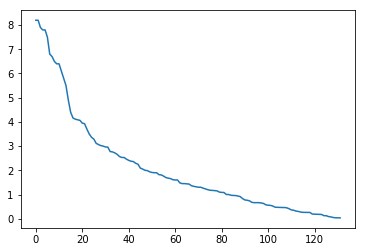

In [37]:
perform_validation(data, filtering=True)